<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [52]:
import pandas as pd
import seaborn as sns

Load the dataset into a dataframe.


In [53]:
df = pd.read_csv("m2_survey_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   OpenSource              11317 non-null  object 
 5   Employment              11398 non-null  object 
 6   Country                 11398 non-null  object 
 7   Student                 11347 non-null  object 
 8   EdLevel                 11286 non-null  object 
 9   UndergradMajor          10661 non-null  object 
 10  EduOther                11234 non-null  object 
 11  OrgSize                 11302 non-null  object 
 12  DevType                 11333 non-null  object 
 13  YearsCode               11389 non-null  object 
 14  Age1stCode              11385 non-null

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<Axes: ylabel='Age'>

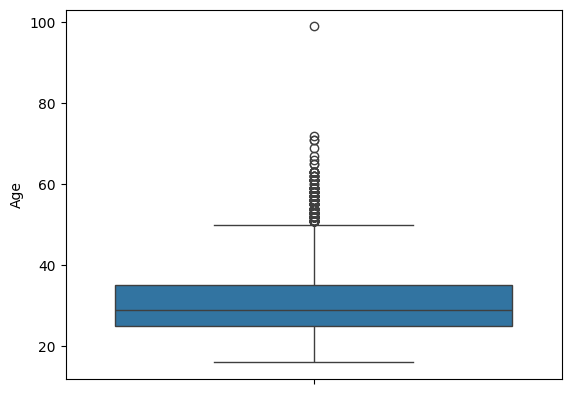

In [54]:
sns.boxplot(df['Age'])

/var/folders/gp/y20h6k2d4tz3tzhgj_k14d1r0000gn/T/ipykernel_35003/3055802692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'])


<Axes: xlabel='ConvertedComp', ylabel='Density'>

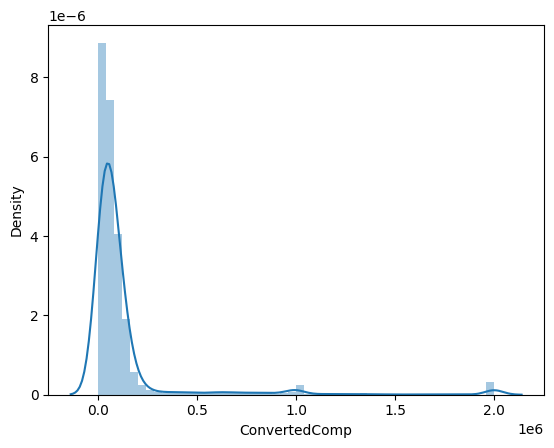

In [55]:

sns.distplot(df['ConvertedComp'])


Plot the histogram for the column `ConvertedComp`.


<Axes: xlabel='ConvertedComp', ylabel='Count'>

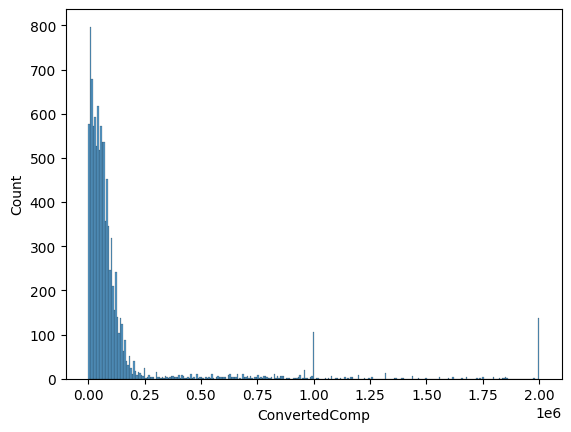

In [56]:
sns.histplot(df['ConvertedComp'], kde=False)


What is the median of the column `ConvertedComp`?


In [57]:
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [58]:
df['Gender'].value_counts()['Man']


10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [59]:
df.groupby('Gender')['ConvertedComp'].median()['Woman']

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [60]:

df['Age'].describe().loc[['min','25%','50%','75%', 'max']]

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<Axes: xlabel='Age', ylabel='Count'>

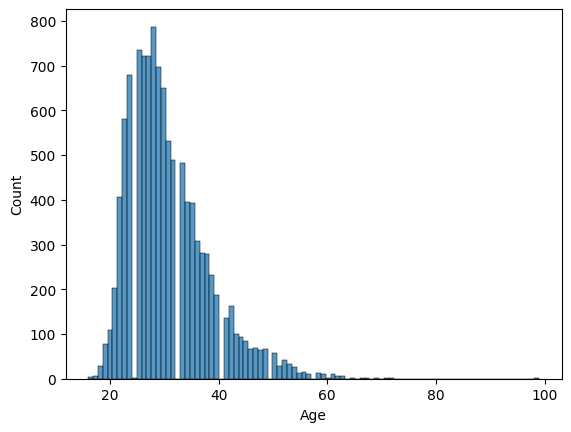

In [61]:

sns.histplot(df['Age'], kde=False)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<Axes: ylabel='ConvertedComp'>

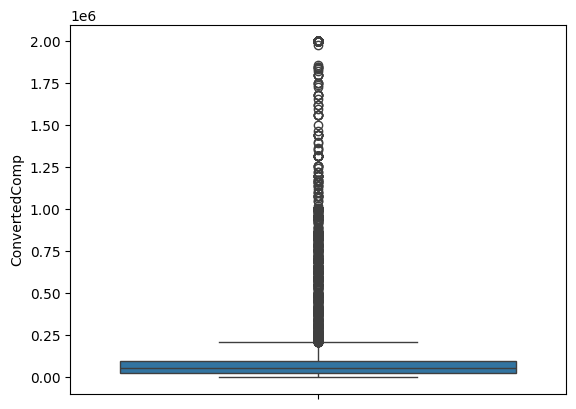

In [62]:

sns.boxplot(df['ConvertedComp'])


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [63]:

df['ConvertedComp'].quantile(0.75) - df['ConvertedComp'].quantile(0.25)

73132.0

Find out the upper and lower bounds.


In [64]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

if lower_bound < 0:
    lower_bound = 0

lower_bound, upper_bound

(0, 209698.0)

Identify how many outliers are there in the `ConvertedComp` column.


In [65]:

def findOutliers() :
    Q1 = df['ConvertedComp'].quantile(0.25)
    Q3 = df['ConvertedComp'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
outliers = findOutliers()
print(len(outliers))


879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


130


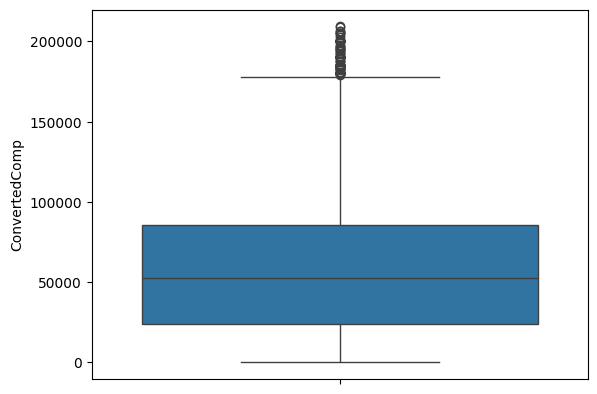

In [66]:

df = df.drop(outliers.index)
sns.boxplot(df['ConvertedComp'])
print(len(findOutliers()))

In [69]:
df['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [68]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_with_age = numeric_df.corrwith(numeric_df['Age'])
print(correlation_with_age)


Respondent       0.003950
CompTotal        0.006371
ConvertedComp    0.401821
WorkWeekHrs      0.037452
CodeRevHrs      -0.017961
Age              1.000000
dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
